## Chargement du modèle et du dataset

In [80]:
from utils.autoloading import instantiate_from_config
from omegaconf import OmegaConf
from lightning import Trainer

config = './logs/03-07-2024_175417_kl-f16/autoencoder_kl-f16.yaml'

config = OmegaConf.load(config)

config.model.ckpt_path = './logs/03-07-2024_175417_kl-f16/checkpoints/epoch=000940.ckpt'
#config.model.ckpt_path = '../pretrained_autoencoder/kl-f16/model.ckpt'

model = instantiate_from_config(config.model)
data = instantiate_from_config(config.data)
data.setup('')

trainer = Trainer(**config.lightning.trainer)

C:\ProgramData\anaconda3\envs\pytorch\lib\site-packages\torch\nn\init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\ProgramData\anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 16, 16, 16) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips\vgg.pth


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


99.50% values are contain between [0, 732]


## Chargement du dataloader

In [81]:
train_loader = data.train_dataloader()
batch0 = list(train_loader)[0]

## Generation des résultats

In [64]:
results = model.log_images(batch0)
samples = results['samples']
reconstructions = results['reconstructions']
inputs = results['inputs']

## Affichage des données générées pour un batch

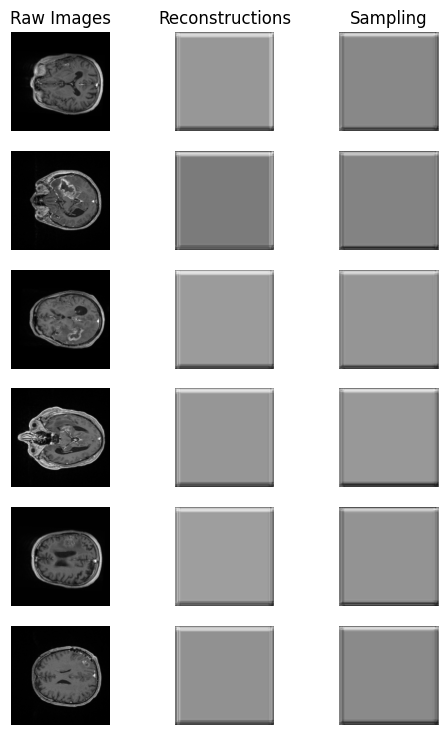

In [65]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(batch0), ncols=3,  figsize=(1*len(batch0), 9))
plt.axis('off')

axs[0, 0].set_title('Raw Images')
axs[0, 1].set_title('Reconstructions')
axs[0, 2].set_title('Sampling')

for i in range(len(batch0)):
    axs[i, 0].axis('off')
    axs[i, 0].imshow(inputs[i].permute(1,2,0), cmap='gray')
    
    axs[i, 1].axis('off')
    axs[i, 1].imshow((reconstructions[i]).permute(1,2,0), cmap='gray')
    
    axs[i, 2].axis('off')
    axs[i, 2].imshow(samples[i].permute(1,2,0), cmap='gray')

In [58]:
inputs.max()

tensor(1.3326)

In [79]:
a = 1545611651561.1845618461548
print(f'a: {a:06}')
print('{:06}'.format(a))

a: 1545611651561.1846
1545611651561.1846


In [88]:
a = None
if a is not None:
    print('ok')